# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

print(type(data))
# Success - Display the first record
display(data.head(n=1))

# show me all header/column
print(list(data.columns.values))

#filter on index:   data.set_index('income')

#List unique income values
print( data['native-country'].unique())

#fix wrong country name
print('*******There is no country called [South] or [Hong] ....misspell...need correction!! *******')
display(data[(data['native-country'] == ' South')].head(2))   
display(data[(data['native-country'] == ' Hong')].head(2))  

data = data.replace({'native-country':' South'},  ' South-Afarica').replace({'native-country':' Hong'},  ' Hong-Kong')
display(data[(data['native-country'] ==' South-Afarica')].head(2))
display(data[(data['native-country'] ==' Hong-Kong')].head(2)) 
#filter on value...show me >50K
display(data[(data.income == '>50K')].head(2))
# what about age and education from statistical point of view
print('----education statistics----')
data['education-num'].describe()

<class 'pandas.core.frame.DataFrame'>


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
*******There is no country called [South] or [Hong] ....misspell...need correction!! *******


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
843,43,Private,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0.0,0.0,50.0,South,<=50K
1814,45,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0.0,0.0,50.0,South,>50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2433,27,Private,Bachelors,13.0,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0.0,0.0,40.0,Hong,<=50K
9413,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,Hong,>50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
843,43,Private,Masters,14.0,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,0.0,0.0,50.0,South-Afarica,<=50K
1814,45,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0.0,0.0,50.0,South-Afarica,>50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2433,27,Private,Bachelors,13.0,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0.0,0.0,40.0,Hong-Kong,<=50K
9413,28,Local-gov,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,Hong-Kong,>50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K


----education statistics----


count    45222.000000
mean        10.118460
std          2.552881
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records --> len(data.index)
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[(data.income == '>50K')].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[(data.income == '<=50K')].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k*100.00)/n_records 

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

income >50K by Coubntry


,Country,Nbr,pct>50K
18,Taiwan,25,45.5
23,France,16,44.4
3,India,62,42.2
7,England,47,39.5
10,Iran,22,39.3


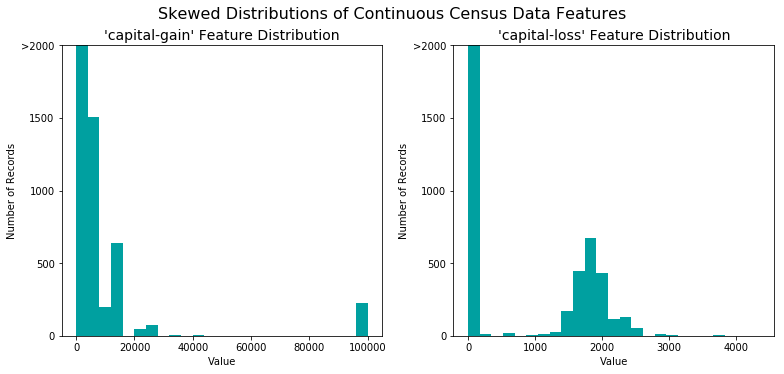

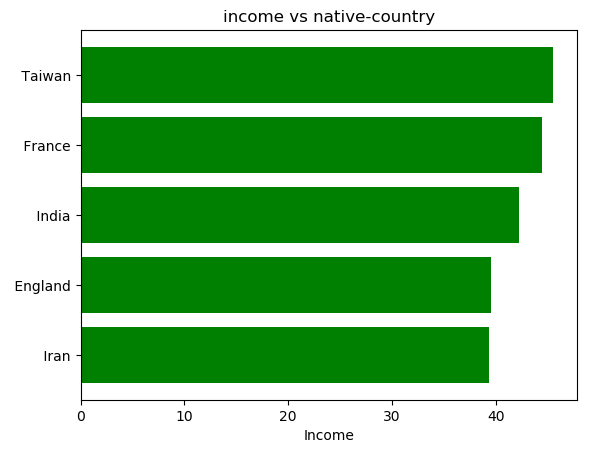

80+% of people from South America Conntries are making less than 50K.


In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

#I suspect Age, education, hours per week should higly correlate to income, but marital status or country of origin  does not.
#We may be able to eliminate some features like these out initially. If we keep country and pivot it to make each country as one 
# feature (column), we  will be wasting lot of energy to deal with useless or irrelavent info.
# Can I rank country by the difference of percentage of >50K vs <=50K by country 
incomeRankbyCountry=[]
print("income >50K by Coubntry")
for nativeCountry in data['native-country'].unique():
    countynm = nativeCountry
    ctgt50k = data[(data['native-country']==countynm) & (data['income']=='>50K')].shape[0]
    ctlt50k = data[(data['native-country']==countynm) & (data['income']=='<=50K')].shape[0]
    incomeRankbyCountry.append({'Country':countynm  ,
                                'pct>50K': round(100.0*ctgt50k /(ctgt50k+ctlt50k),1),
                                'Nbr':ctgt50k})
    #print(countynm,"{0:.1f}%".format(round( 100.0*ctgt50k /(ctgt50k+ctlt50k),1)))

incomevsCountry = pd.DataFrame(incomeRankbyCountry).sort_values(['pct>50K'],ascending=[0])

#top 5 high income native-countries
display(incomevsCountry.head(n=5))

#plot income vs native-country
vs.bar_plot(incomevsCountry['pct>50K'],incomevsCountry['Country'], 5, 'Income','income vs native-country')
 
#vs.bar_plot(incomevsCountry['Nbr'],incomevsCountry['pct>50K'], 'Income','income vs native-coun
print('80+% of people from South America Conntries are making less than 50K.')

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

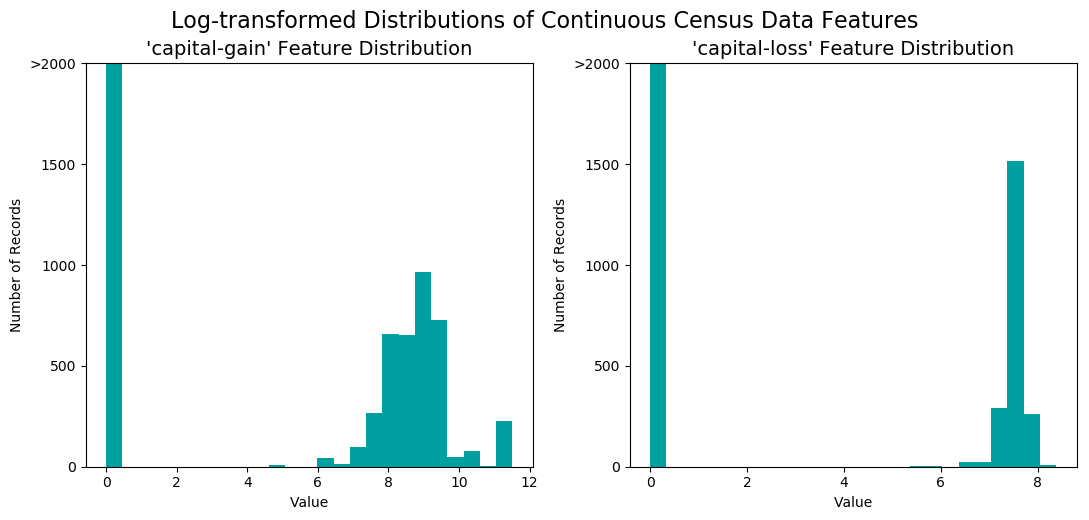

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
#prefixes=['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
grps = data.columns.to_series().groupby(data.dtypes==data['native-country'].dtype).groups
prefixes=list(grps.values())[1].tolist()
prefixes.remove('income')
#remove doesn't return anything. It modifies the existing list in-place
print(prefixes)
 
features_final = pd.get_dummies(features_log_minmax_transform, prefix=prefixes)

featureColumns = list(features_final) 
 
# TODO: Encode the 'income_raw' data to numerical values
income = np.where(income_raw=='>50K', 1,0 )
#income = income_raw.apply(lambda x: 1 if x == '>50K' else 0)

#how many income =1....should return 11208 as before
print(np.sum(income))
print(len([elem for elem in income if elem == 1] ) )
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(len(encoded))
print(type(income))

['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
11208
11208
103 total features after one-hot encoding.
<class 'numpy.ndarray'>


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
display(features_final.head(n = 5))


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South-Afarica,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Import train_test_split cross_validation
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [9]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
Total = len(income)
TP = np.sum(income)  #11208
FP = Total - TP
TN =0
FN =0
accuracy= (TP +TN)/Total
recall = TP/(TP+FN)
precision= TP/(TP+FP)
beta = 0.5
fscore = (1+beta*beta)*precision*recall/(beta*beta*precision+recall) 
print("Simply say all people >50K:  [Accuracy score: {:.4f}, Precision score: {:.4f}, F-score: {:.4f}]".format(accuracy,precision, fscore))
    

''''''
#Three models to choose GaussianNB MultinomialNB  BernoulliNB 
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB 
from sklearn.metrics import f1_score,r2_score,accuracy_score,recall_score,precision_score
modellist=[GaussianNB(),MultinomialNB(),BernoulliNB()]
modellbl=['GaussianNB','MultinomialNB','BernoulliNB']
for clf in modellist:
    model = clf.fit(X_train,y_train)
    lbl = modellbl[modellist.index(clf)]
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    # TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
    fscore = (1+beta*beta)*precision*recall/(beta*beta*precision+recall) 

    # Print the results 
    print("Naive Predictor",lbl,": [Accuracy score: {:.4f}, Precision score: {:.4f}, F-score: {:.4f}]".format(accuracy,precision, fscore))
# MultinomialNB() get 80% accuracy with 0.59 f1 score...pretty good for baseline!

Simply say all people >50K:  [Accuracy score: 0.2478, Precision score: 0.2478, F-score: 0.2917]
Naive Predictor GaussianNB : [Accuracy score: 0.5977, Precision score: 0.3703, F-score: 0.4209]
Naive Predictor MultinomialNB : [Accuracy score: 0.7965, Precision score: 0.5622, F-score: 0.5914]
Naive Predictor BernoulliNB : [Accuracy score: 0.7546, Precision score: 0.4978, F-score: 0.5372]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

We want to predict who is making more than $50K based on a bunch of demographic infomation from census, a typical classification problem with hgih dimensions. So we need try to find the best supervised learning model, so we can track the potential donors for our charity. 

Ref:
https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons/
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/


I will examine the following three classification models   
    Gaussian Naive Bayes 
    Support Vector Machines (SVM)  
    Ensemble Methods (Bagging, AdaBoost, Random Forest) 

    
(1) Naive Bayes 
    (a) Often used as baseline for text categorization or document classification tasks.
        Real world application: Fraud detection, Risk management
        For example, we can analyze presidential speech based on frequently used words to ID the speech with high confidence.
        
    (b) Pros: Simple and fast, especially suitable for high # of features (high dimensionality). 
              Can be used in regression as well as classification.
              This algorithm might outperform more complex models when the data set isn’t large enough.
    (c) Cons: Assume each feature is independent of any other feature,so if the features are correlated, it may not work well.
              It will not yield good judgement on snetiment analysis, as it does not consider the order/sequence of words.
    (d) We have 103 features after pivot countries, education etc to columns (features) from categorical values, we need models 
        that can handel high dimensions well. Gaussian Naive Bayes model is perfect for our base-line analysis.  

    
(2) SVM (SVC, SVR)
    Ref: https://data-flair.training/blogs/applications-of-svm/
    (a)  SVW works by projecting feature space via proper kernel function into kernel space and making the classes linearly
         separable to achieve maximum margin and mininum error. 
         Real world application:text analysis, NLP applications,Bioinformatics, Classification of images, Face detection as 
         well as Handwriting recognition.
         
         Example: Predict certain disease (cancer or diabetes for example) w.r.t. genes or other medical conditions, family 
         history, age, race and ethnicity, weight, height, waist circumference, body mass index (BMI), and hypertension.  
  
     (b) Pros: Can be used for classification and regression analysis in supervised learning, even Semi-Supervised Learning.
               Can handle large feature space.
               Can handle non-linear feature interactions.
               Does not rely on entire data.
               Can be used to handle skewed data via class_weight and sample_weight 
               Allow cutomize kernal function (Define your own).
               Linear splines kernel in one-dimension is very effective on sparse data.
               
     (c) Cons: Not very efficient with large number of observations...taking too much longer to run when sample is big
              It can be tricky to find appropriate kernel sometimes (linear, nonlinear, polynomial, Gaussian kernel, Radial
              basis function (RBF), sigmoid, ANOVA radial basis kernel, Linear splines kernel in one-dimension etc)
     (d) It seems SVM with Linear splines kernel in one-dimension is a better choice from theroy. But from sklearn, we don't
         have it. We can only use SVC with following kernel functions directly: linear, poly, rbf (default), sigmoid. 

(3) Ensemble Methods (Bagging, AdaBoost,Random Forest) 
    (a) This is used almost everywhere decision tree is used, which is almost any classification scanrio. 
        Credit/loan default risk analysis is one real world example.
        
    (b) Pros: Simple to understand and grasp conceptually. 
              Works for either categorical or numerical data
              Good for data set which has missing value attributes.
              Do not assume feature independence like Naive Bayes (no data distribution requirement)
              Can be combined with other decision techniques. 
 
    
    (c) Cons: Watch for overfitting .
              For data including categorical variables with different number of levels, information gain in decision trees is 
              biased in favor of those attributes with more levels
    
    (d) Out of those 103 features, we definitely have some noise features. Some features are far more correlated than others to 
    income.   Since Random Forest(RF) will do just that ( removing noise features). Random forest is flexible and can enhance the accuracy/performance of the weak algorithm to a better extent, at the expense of heavier computational resources required. I will use RF to get the top features, and then use the top feature to feed AdaBoost ( whose default's algorithm is Desion Tree).
 

As a rule of thumb for classification task, start with simple Logistic Regression, then try decision tree (rain forest), then try SVM or Gradient Boosted Decision Trees(GBDT), with ensemble methods to take advantage of collective wisdom.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics  import fbeta_score, accuracy_score
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = (end - start) #total_seconds()

    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = (end - start) #.total_seconds()

    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    #accuracy_score(y_true, y_pred
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
         
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    #fbeta_score(y_true, y_pred, average='weighted', beta=0.5)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='binary')
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='binary')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [11]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import  SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# TODO: Initialize the five models
clf_A = DecisionTreeClassifier(random_state = 99)
#LogisticRegression(C=1e5)
clf_B = AdaBoostClassifier(random_state = 67)
#AdaBoostClassifier uses DecisionTreeClassifier as default base_estimator
clf_C = SGDClassifier(random_state = 48)
clf_D = SVC(kernel='rbf')
clf_E = GaussianNB() 
# RandomForestRegressor(random_state=87)   # cannot used here?
#SVC(kernel='rbf')

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 =  int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

        
print(  SVC(kernel='rbf').__class__.__name__)
results['SVC']

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
SVC


{0: {'train_time': 0.010027170181274414,
  'pred_time': 0.2657461166381836,
  'acc_train': 0.76,
  'acc_test': 0.7562189054726368,
  'f_train': 0.0,
  'f_test': 0.0},
 1: {'train_time': 0.9555737972259521,
  'pred_time': 1.889033317565918,
  'acc_train': 0.8333333333333334,
  'acc_test': 0.8326147042564953,
  'f_train': 0.6712962962962963,
  'f_test': 0.6712564543889845},
 2: {'train_time': 96.77687621116638,
  'pred_time': 16.46621584892273,
  'acc_train': 0.8533333333333334,
  'acc_test': 0.8371475953565506,
  'f_train': 0.7196969696969697,
  'f_test': 0.6744771706996605}}

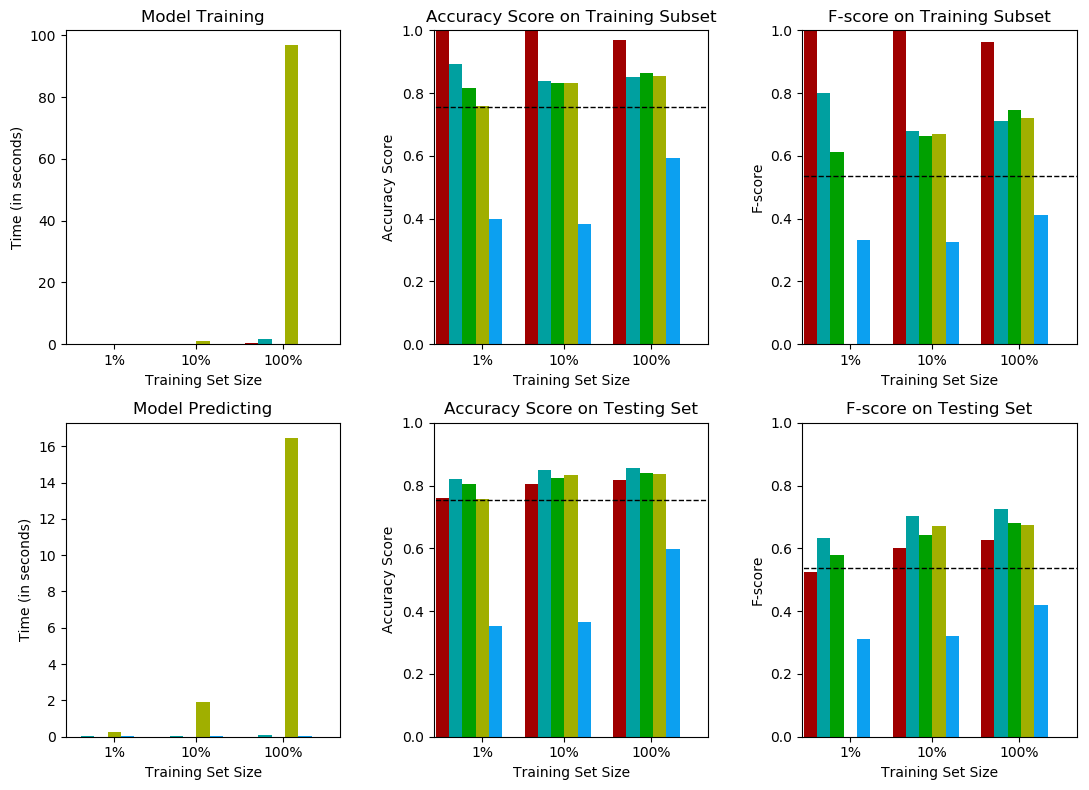

In [14]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluated(results, accuracy, fscore)
 

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

In [ ]:
for k, v in results.items():
    for kk,vv in v.items():
        if(kk==2):
            print(k,vv['f_test'])

I did test run for 5 models:
    DecisionTreeClassifier(random_state = 99)
    AdaBoostClassifier(random_state = 67)
    SGDClassifier(random_state = 48)
    SVC(kernel='rbf')
    MultinomialNB() 
All models gave decent accuracy score ( around 80%) for both train and test.
Based on 100% sample training data, the F score are as follows:
    DecisionTreeClassifier 0.626
    AdaBoostClassifier     0.724
    SGDClassifier          0.681
    SVC                    0.674
    MultinomialNB          0.591
AdaBoostClassifier got the highest F Score (0.7245), slightly higher (0.043) than SGDClassifier and 0.054 higher than SVC.
Looking at the time chart, SVC used far more time than rest models due to the nature of the model trying to find maximun margin with minum error in this high feature space with large number of cases/events. 
Decision tree always get high F Score even with as little as 1% sample data, but with lower F score for testing, a clearly  sign of overfitting. It is worth noting that SVC did not produce one F-score on neither the training  nor the testing with 1% sample. That may be due to the fact the F score is so low ( close to 0) with so small smaple that it simple rejects any outcome out-right.
Of course, we are just poking around and need do more investigation ton find the best model. For now, I am inclined to AdaBoostClassifier model for this project.


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

There is a Chinese proverb that goes like this: three laymen can come up with a better action plan than one sage can.  AdaBoost, short for Adaptive Boosting, is doing that in essence. It starts with one simple predictionclassifiers ( or model we called a weak learner) like Decision Tree or Logistic Regression, and may not give the correct prediction or outcome. But we adjust/tweak the weaker learner (the same model) with difference parameter or weight in favor of those instances misclassified by previous classifiers,to do next prediction. It will be done iteratively,adjusting every iteration for the next prediction. That is why  it is adaptive. The individual learner can be weak, but as long as the performance of each one is slightly better than random guessing, the final model can be proven to converge to a strong learner. 

In summary,  Ada-boost classifier combines weak classifier algorithm to form strong classifier. A single algorithm may classify the objects poorly. But if we combine multiple classifiers with selection of training set at every iteration and assigning right amount of weight in final voting, we can have good accuracy score for overall classifier. (Ref. https://medium.com/machine-learning-101/https-medium-com-savanpatel-chapter-6-adaboost-classifier-b945f330af06)

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV 
from sklearn.metrics import make_scorer,precision_score 
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
# TODO: Initialize the classifier
clf = AdaBoostClassifier(random_state=67)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators' : [20,50,100,200], 'learning_rate' : [0.1,0.5,1.0,1.5]}
#There is a trade-off between learning_rate and n_estimators.

# TODO: Make an fbeta_score scoring object using make_scorer()  greater_is_better=True, needs_proba=False
scorer = make_scorer(fbeta_score, beta = 0.5)  #, needs_proba=True  will cause error!!

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring =scorer )

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Precison score on testing data: {:.4f}".format(precision_score(y_test, predictions)))
print("Recall score on testing data: {:.4f}".format(recall_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
 
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final precison score on the testing data: {:.4f}".format(precision_score(y_test, best_predictions)))
print("Final recall score on the testing data: {:.4f}".format(recall_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.8576      |    0.8640       |
| Precison score |       0.7628      |    0.7642       |
| Recall score   |       0.6036      |    0.6395       |
| F-score        |       0.7246      |    0.7355       |

The optimized scores are shown in above table, with just a slight improvement.
For the naive predictor benchmarks of assuming everyone is making more than 50K, the accuracy score is 0.2478, precision score is 0.2478 and F-score is 0.2917. Of course, the final model is wau better. 

But comparing the real  base-line I assumed using Naive Predictor GaussianNB where accuracy score is 0.5970, Precision score is 0.3698, and F-score is 0.4202, the final model is still much better. All the work is not wasted (grin).

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [ ]:
# Feature importance
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=1)
regr.fit(X_train,y_train)
 
#print the order of feature importance
importances_RF = regr.feature_importances_
feature_importances = pd.DataFrame(importances_RF).sort_values([0],ascending=[0])
indices = np.argsort(importances_RF)[::-1]
print(' Top 10 features: ')
fn=[]
for f in indices[:10]:
    fn.append(featureColumns[f])
    print(featureColumns[f], "  is a factor (%f)" % (importances_RF[f]))

# Plot the feature importances 
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 10))
plt.title("Feature importances")
plt.bar(range(10), importances_RF[indices[:10]],
       color="blue",  align="center")
plt.xticks(range(10), fn)
plt.xlim([-1, 10])
plt.show()

In [ ]:
#let's verify top 5 features with RFE......slower than RandomForestRegressor
from sklearn.feature_selection import RFE 
#from sklearn.svm import SVR #expansive...long running
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()  #SVR(kernel="linear") #takes for ever to run
selector = RFE(estimator,n_features_to_select=5)
selector.fit(X_train,y_train)
selector.ranking_

#The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
#Selected (i.e., estimated best) features are assigned rank 1.

for i,e in enumerate(selector.ranking_):
    if e ==1:
        print(featureColumns[i])  
 

Based on common sense and my experience, I expect the top 5 features as follows:

capital-gain
capital-loss
education-num
age
hours-per-week

If you are in stock market, you are sure to have some spare money to invest or to donate. So capital-gain and
capital-loss should be the top ones. 
If you got high education, you usually get paid well and has some monet set aside for charity and donation. 
If you are old enough, you should accumlated some wealth and ready to give some. You do not want die with tone of money left.

Also I do think marital-status is one important feature (maybe 6th..wild guess)

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
#
clf = AdaBoostClassifier(random_state = 11)
model = clf.fit(X_train, y_train)
importances_AdaBoost = clf.feature_importances_

# Print Rank....[::-1] reverse the list/array
indices = np.argsort(importances_AdaBoost)[::-1]
print(' Top 10 features: ')
fn=[]
for f in indices[:10]:
    fn.append(featureColumns[f])
    print(featureColumns[f], "  is a factor (%f)" % (importances_AdaBoost[f]))
    
# Plot
vs.feature_plot(importances_AdaBoost, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

Five features predicted are very close to what I expected/guessed.
The visualization confirmed my thoughts.
Since we converted categorical variables to multiple features for our model, race and marital status is converted into many features. It make sense that people with bachelor degree tends to make more than 50K...otherwise, why people spend tons of student loan to get a higher education.

I am curious if we remove ir-relavent features like native_country from get-go, we can remove LOT of features from very beginning.  

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone
for nbrFeatures in [5,6]:
    i = -1
    for importances in [importances_AdaBoost,importances_RF]:
        i = i + 1
        # Reduce the feature space
        X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:nbrFeatures]]]
        X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:nbrFeatures]]]

        # Train on the "best" model found from grid search earlier
        clf = (clone(best_clf)).fit(X_train_reduced, y_train)

        # Make new predictions
        reduced_predictions = clf.predict(X_test_reduced)
        if(i%2==0):
            print('\n With top ',nbrFeatures, ' Features extracted from AdaBoostClassifier, Final Model trained on full data\n------')
        if(i%2==1):
            print('\n With top ',nbrFeatures, ' Features extracted from RainForest, Final Model trained on full data\n------')

        # Report scores from the final model using both versions of data
        print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
        print("\nFinal Model trained on reduced data\n------")
        print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
        print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

Using only top 5 features extracted via AdaBoostClassifier mdoel and use AdaBoostClassifier mdoel to predict.  
    capital-loss   
    age   
    capital-gain   
    hours-per-week    
    education-num
Accuracy (0.8640 ->0.8391)  and F score (0.7355->0.6927) all dropped a little.

Yet, if we use top 6 features extracted from RainForestRegessor, but use AdaBoostClassifier mdoel to predict.
    marital-status_ Married-civ-spouse   
    age    
    education-num    
    capital-gain    
    hours-per-week    
    capital-loss    

we almost got the same with 103 features from AdaBoostClassifier.
Accuracy (0.8640 ->0.8589)  and F score (0.7355->0.7303) just dropped slightly. 

So, it will make sense to use reduced features if training time is a factor.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
#Question for mentor... 
#1. Can we use one method (RainForest) to get reduced features and then use another model (AdaBoost) to do fit/predict?
#2. If so, is this mixed method a general practice in the real world? 